In [1]:
import numpy as np
import torch
import pandas as pd
import glob
import numpy as np
import pandas as pd
import yaml
import os
import math
import scipy.io as sio
from pathlib import Path

from plotting import *
from utils import *
from TMP_model import MP_model,TestTMPModel

In [ ]:
# Extract motion of videos for each subject and save all subfiles
#  in a folder same name of videos in the same directory of original video 

In [3]:
import scipy.io as sio
import os

# List of all subjects to process
all_subjects = [1,2,3,4,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
            31,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]

completed_subjects = [1,2,10,11,12,13,15,16,17,18,19,22, 20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
subjects = [37,38,39,40,41,42,43,44,45,46,47,48,49]

v3d_base_path = '../../../data/01_raw/F_Subjects/'
video_base_path = '../../../data/'

for subject_id in subjects:
    v3d_file = f'{v3d_base_path}F_v3d_Subject_{subject_id}.mat'
    video_file = f'{video_base_path}F_PG1_Subject_{subject_id}_L.avi'
    
    # Process the subject
    try:
        main_rub = sio.loadmat(v3d_file, squeeze_me=True, struct_as_record=False)
        single_videos(video_file, main_rub)
        print(f"Successfully processed Subject {subject_id}")
    except Exception as e:
        print(f"Error processing Subject {subject_id}: {e}")

Created output directory: ../../../data/F_PG1_Subject_37_L
Loaded existing motion mapping with 35 entries.
Available motions in this file:
  Added new motion: 'swinging_racket_rm' with ID 35
Saved motion mapping with 36 entries.
Video processing complete. All segments saved to ../../../data/F_PG1_Subject_37_L
Successfully processed Subject 37
Created output directory: ../../../data/F_PG1_Subject_38_L
Available motions in this file:
Saved motion mapping with 36 entries.
Video processing complete. All segments saved to ../../../data/F_PG1_Subject_38_L
Successfully processed Subject 38
Created output directory: ../../../data/F_PG1_Subject_39_L
Available motions in this file:
Saved motion mapping with 36 entries.
Video processing complete. All segments saved to ../../../data/F_PG1_Subject_39_L
Successfully processed Subject 39
Created output directory: ../../../data/F_PG1_Subject_40_L
Available motions in this file:
Saved motion mapping with 36 entries.
Video processing complete. All segme

#### Data Processing Workflow on server

1. Connect to VPN

2. Connect to remote server via SSH with port forwarding:
   ```bash
   ssh -p 38954 -L 8888:localhost:8888 arefeh@130.15.106.49
   ```
3. Activate virtual environment:
   ```bash
   source ~/myenv/bin/activate
   ```
4. Start Jupyter notebook on remote server:
   ```bash
   jupyter notebook --no-browser
   ```
5. In a new terminal session, transfer video folders one by one:
   ```bash
   scp -r -P 38954 F_PG1_Subject_49_L arefeh@130.15.106.49:/data1/users/arefeh/movementProject/MMpose/videos
   ```
6. Edit the main.py file on server to update subject IDs:
   ```bash
   # Path: movementProject/MMpose/main.py
   # Update the subject IDs as needed
   ```
7. Open a screen session:
   ```bash
   screen -r mysession
   ```
8. Run the main script:
   ```bash
   python main.py
   ```
9. Detach from screen session (to let it run in background):
   ```bash
   # Press Ctrl+A and then D
   ```
10. After processing completes, transfer results back to local machine:
    ```bash
    scp -r -P 38954 arefeh@130.15.106.49:/data1/users/arefeh/movementProject/MMpose/pred_out ./data/MMpose/pred_out
    ```

In this step, I gave those extracted motion videos to MMpose on the server
got 3d pose json files on server. 

Now I load separated motion vidoes json file, 
merge them in fixed order based on motion_mapping
and concatenate them in one datafrma for each subject

In [3]:

# Define settings and parameters
subjects = [27,28,29,30,31,32,33,34,35,36]
source_folder = '../../../data/MMpose/pred_out'
destination_folder = "../../../data/MMpose/df_files_3d"
merged_folder = "../../../data/MMpose/merged_csv_files"
visualization_folder = "../../../data/MMpose/visualizations"

# Load motion mapping
with open('../../../data/motion_mapping.json', 'r') as f:
    motion_mapping = json.load(f)['mapping']
    # Invert mapping for easier lookup
    id_to_motion = {str(v): k for k, v in motion_mapping.items()}

# Define equivalent motions - map to canonical ID
equivalent_motions = {
    # Format: ID: canonical_ID
    "20": "20",  # stretching -> stretching
    "31": "20",  # stretching_rm -> stretching
    "11": "11",  # cross_arms -> cross_arms
    "24": "11",  # crossarms -> cross_arms
    "12": "12",  # jumping_jacks -> jumping_jacks
    "23": "12",  # jumping_jack -> jumping_jacks
}

 
subject_motions, common_motions = create_csv_from_json(
    source_folder, destination_folder, subjects, equivalent_motions, id_to_motion
)
    
merge_subject_csv_files(destination_folder, merged_folder, subjects, common_motions)


Common motions across all subjects: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20]
Motion names: ['hand_clapping', 'jogging', 'walking', 'cross_legged_sitting', 'vertical_jumping', 'crawling', 'hand_waving', 'running_in_spot', 'checking_watch', 'kicking', 'taking_photo', 'cross_arms', 'jumping_jacks', 'scratching_head', 'throw/catch', 'pointing', 'sitting_down', 'sideways', 'phone_talking', 'stretching']


KeyboardInterrupt: 

Visualizing motion 2: walking
  Visualizing joint: Hip
  Visualizing joint: RHip
  Visualizing joint: RKnee
  Visualizing joint: RAnkle
  Visualizing joint: LHip


KeyboardInterrupt: 

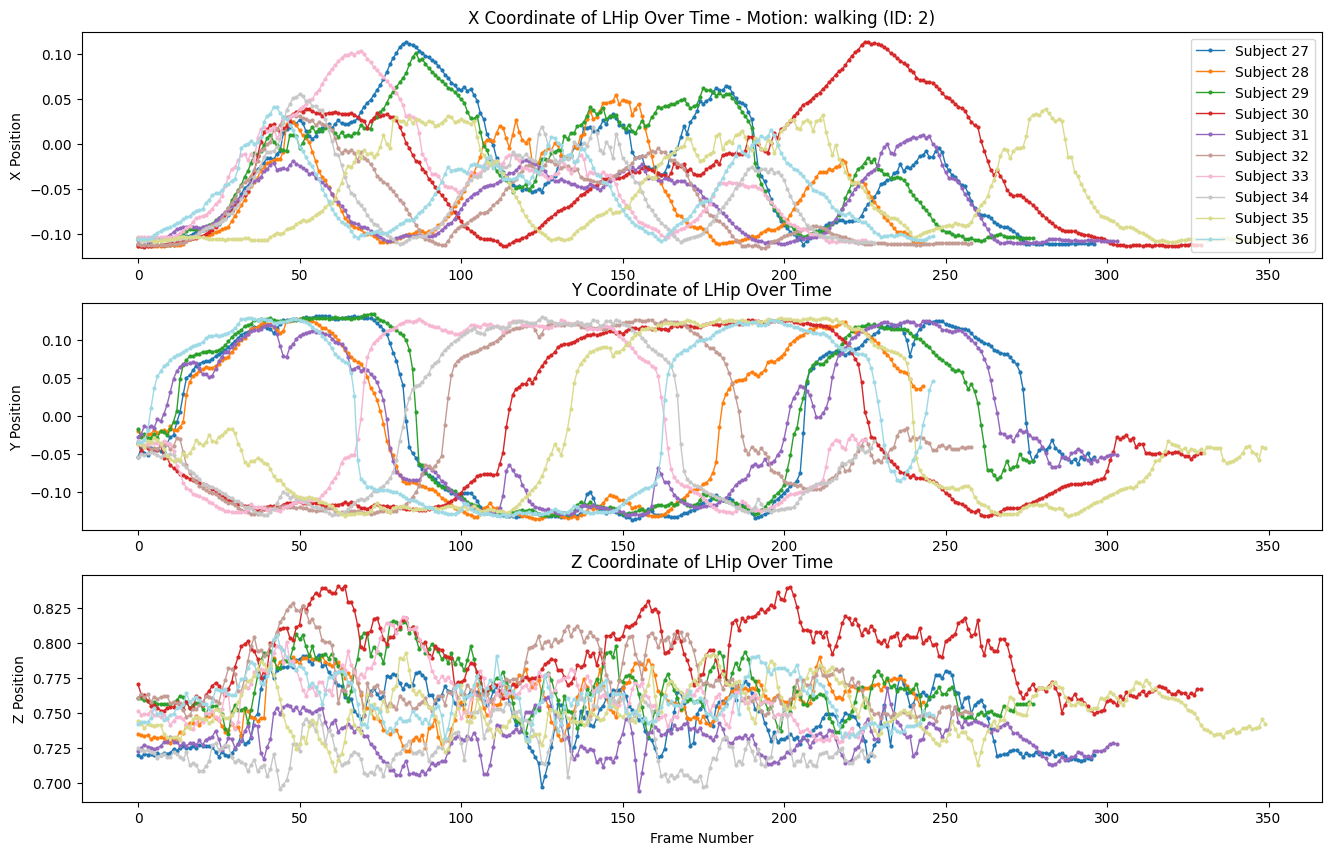

In [4]:
motions_to_visualize = [2]
visualize_joint_trajectories(merged_folder, visualization_folder, motions_to_visualize, subjects, id_to_motion)


In [ ]:
# Now we have 3d pose data csv files in same order motion videos for all subjects
# Visualize some frames in one sample csv file to verify 3d data

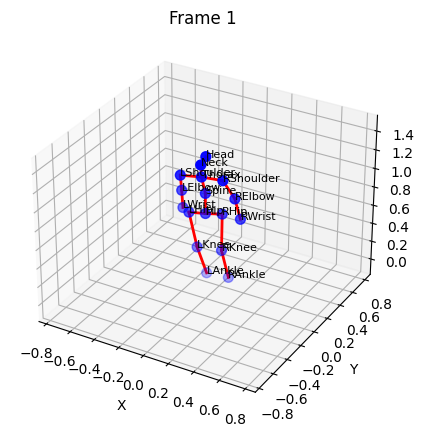

In [5]:
csv_file_path = "../../../data/MMpose/merged_csv_files/subject_32_all_motions.csv"  

if not os.path.exists(csv_file_path):
    print(f"Error: File not found at {csv_file_path}")
else:
    df_3d = pd.read_csv(csv_file_path)

first_frame_id = 1
fig = visualize_frame_3d(df_3d, first_frame_id)

# If you want to verify multiple frames, you could do:
# for frame_id in df_3d['frame_id'].unique()[2:7]:  # First 5 frames
#     visualize_frame_3d(df_3d, frame_id)

In [22]:
# Now we need to convert csv files to bvh format so we can use for TMP model

In [2]:
source_folder =  "../../../data/MMpose/merged_csv_files"
destination_folder = "../../../data/MMpose/bvh_files"  

os.makedirs(destination_folder, exist_ok=True)

csv_files = glob.glob(os.path.join(source_folder, "*.csv"))

for file_path in csv_files:
    print(f"Processing file: {file_path}")
    
    with open(file_path, 'r') as f:
        df_3d = pd.read_csv(f)

    filename = os.path.basename(file_path)
    filename_without_ext = os.path.splitext(filename)[0]
    output_bvh_path = os.path.join(destination_folder, f"{filename_without_ext}.bvh")
    create_h36m_bvh(df_3d, output_bvh_path, fps=120)

Processing file: ../../../data/MMpose/merged_csv_files/subject_17_all_motions.csv
BVH file created at ../../../data/MMpose/bvh_files/subject_17_all_motions.bvh
Processing file: ../../../data/MMpose/merged_csv_files/subject_31_all_motions.csv
BVH file created at ../../../data/MMpose/bvh_files/subject_31_all_motions.bvh
Processing file: ../../../data/MMpose/merged_csv_files/subject_46_all_motions.csv
BVH file created at ../../../data/MMpose/bvh_files/subject_46_all_motions.bvh
Processing file: ../../../data/MMpose/merged_csv_files/subject_23_all_motions.csv
BVH file created at ../../../data/MMpose/bvh_files/subject_23_all_motions.bvh
Processing file: ../../../data/MMpose/merged_csv_files/subject_34_all_motions.csv
BVH file created at ../../../data/MMpose/bvh_files/subject_34_all_motions.bvh
Processing file: ../../../data/MMpose/merged_csv_files/subject_22_all_motions.csv
BVH file created at ../../../data/MMpose/bvh_files/subject_22_all_motions.bvh
Processing file: ../../../data/MMpose/me

In [3]:


def convert_motion_id_to_bvh(motion_id, id_to_motion=None):
    source_folder = "../../../data/MMpose/df_files_3d"
    
    # Create a specific destination folder for this motion
    motion_name = id_to_motion.get(str(motion_id), f"motion_{motion_id}") if id_to_motion else f"motion_{motion_id}"
   
    destination_folder = f"../../../data/MMpose/bvh_files/bvh_files_motion_{motion_id}_{motion_name}"
    
    os.makedirs(destination_folder, exist_ok=True)
    
    padded_motion_id = str(motion_id).zfill(2)
    
    csv_pattern = f"subject_*_motion_{padded_motion_id}.csv"
    csv_files = glob.glob(os.path.join(source_folder, csv_pattern))
    
    print(f"Processing motion ID: {motion_id} ({motion_name})")
    print(f"Found {len(csv_files)} CSV files for this motion")
    
    for file_path in csv_files:
        
        df_3d = pd.read_csv(file_path)
        filename = os.path.basename(file_path)
        filename_without_ext = os.path.splitext(filename)[0]
        output_bvh_path = os.path.join(destination_folder, f"{filename_without_ext}.bvh")
        
        create_h36m_bvh(df_3d, output_bvh_path, fps=120)
    
    print(f"Conversion complete for motion {motion_id} ({motion_name})")


In [4]:
# get motion capture data for specific motion 
with open('../../../data/motion_mapping.json', 'r') as f:
    motion_mapping = json.load(f)['mapping']
    # Invert mapping for easier lookup
    id_to_motion = {str(v): k for k, v in motion_mapping.items()}

for i in range(5):

# Convert a specific motion ID to BVH
    motion_id = i # Example: 2: walking
    motion_name = id_to_motion.get(str(motion_id), f"unknown_motion_{motion_id}")
    print(motion_name)
    convert_motion_id_to_bvh(motion_id, id_to_motion=id_to_motion)

    

hand_clapping
Processing motion ID: 0 (hand_clapping)
Found 41 CSV files for this motion
BVH file created at ../../../data/MMpose/bvh_files/bvh_files_motion_0_hand_clapping/subject_33_motion_00.bvh
Created BVH file: ../../../data/MMpose/bvh_files/bvh_files_motion_0_hand_clapping/subject_33_motion_00.bvh
BVH file created at ../../../data/MMpose/bvh_files/bvh_files_motion_0_hand_clapping/subject_48_motion_00.bvh
Created BVH file: ../../../data/MMpose/bvh_files/bvh_files_motion_0_hand_clapping/subject_48_motion_00.bvh
BVH file created at ../../../data/MMpose/bvh_files/bvh_files_motion_0_hand_clapping/subject_46_motion_00.bvh
Created BVH file: ../../../data/MMpose/bvh_files/bvh_files_motion_0_hand_clapping/subject_46_motion_00.bvh
BVH file created at ../../../data/MMpose/bvh_files/bvh_files_motion_0_hand_clapping/subject_45_motion_00.bvh
Created BVH file: ../../../data/MMpose/bvh_files/bvh_files_motion_0_hand_clapping/subject_45_motion_00.bvh
BVH file created at ../../../data/MMpose/bvh_fi

Model Training

In [3]:

destination_folder = f"../../../data/MMpose/bvh_files/bvh_files_motion_{motion_id}_{motion_name}"
folder_path = "../../../data/MMpose/bvh_files" 
# folder_path = destination_folder  # if specific motion is assumed for trainng only
    # Read BVH files
bvh_data = read_bvh_files(folder_path)
if not bvh_data:
    raise ValueError("No BVH files could be read")

# Process data according to paper specifications
processed_data2 = process_bvh_data(bvh_data)
# a = [torch.tensor(d) for d in processed_data2]
num_segments = len(processed_data2)


# based on TMP code: the format of data=list(segment_data[signals,time]) --> signals are fixed but time 
# could vary in segments
# as far as i underastand:
# num segments = number of videos we have (each subject)
# num_signals =  number of sensors/signals. = number of features / joint infor in data = 54 here
print(f'num of segments : {num_segments}')
num_signals = processed_data2[0].shape[0]
print(f'num of signal : {num_signals}')


Processed segment shape: (54, 368)
Processed segment shape: (54, 301)
Processed segment shape: (54, 290)
Processed segment shape: (54, 236)
Processed segment shape: (54, 408)
Processed segment shape: (54, 228)
Processed segment shape: (54, 378)
Processed segment shape: (54, 334)
Processed segment shape: (54, 501)
Processed segment shape: (54, 284)
Processed segment shape: (54, 373)
Processed segment shape: (54, 530)
Processed segment shape: (54, 367)
Processed segment shape: (54, 412)
Processed segment shape: (54, 330)
Processed segment shape: (54, 278)
Processed segment shape: (54, 293)
Processed segment shape: (54, 407)
num of segments : 18
num of signal : 54
